# Exercises week 36

## Deriving and Implementing Ridge Regression

## Learning goals

After completing these exercises, you will know how to
- Take more derivatives of simple products between vectors and matrices
- Implement Ridge regression using the analytical expressions
- Scale data appropriately for linear regression
- Evaluate a model across two different hyperparameters

## Exercise 1 - Choice of model and degrees of freedom

**a)** How many degrees of freedom does an OLS model fit to the features $x, x^2, x^3$ and the intercept have?

In this case, the degrees of freedom is n-4, n being the number of observations.

**b)** Why is it bad for a model to have too many degrees of freedom?

This can cause overfitting of the training data.

**c)** Why is it bad for a model to have too few degrees of freedom?

This leads to high bias; the model is too simple.

**d)** Read [chapter 3.4.1 of Hastie et al.'s book](https://link.springer.com/book/10.1007/978-0-387-84858-7). What is the expression for the effective degrees of freedom of the ridge regression fit?

$$
df(\lambda) = \sum_{j=1}^{p} \frac{d_j^2}{d_j^2 + \lambda}
$$

**e)** Why might we want to use Ridge regression instead of OLS?

1. If the predictors are highly correlated, OLS estimates will be unstable (sensitive to small changes in data, high variance), 2. If there are fewer observations than predictors, OLS does not work

**f)** Why might we want to use OLS instead of Ridge regression?

1. If there are not many predictors


## Exercise 2 - Deriving the expression for Ridge Regression

The aim here is to derive the expression for the optimal parameters using Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

By minimizing the above equation with respect to the parameters $\boldsymbol{\beta}$ we could then obtain an analytical expression for the parameters $\boldsymbol{\hat\beta_{OLS}}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. (One can require as part of the optimization problem that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is a finite number larger than zero. We will not implement that in this course.)

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix.

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

In [ ]:
# ?? 

## Exercise 3 - Scaling data

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [97]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Adapt your function from last week to only include the intercept column if the boolean argument `intercept` is set to true.

In [98]:
def polynomial_features(x, p, intercept=False):
    n = len(x)
    X = np.zeros((n, p + 1))

    for i in range(p+1):
        X[:,i] = x**i # loops from 0 to p, first column intercept

    if intercept:
        return X
    else:
        return X[:,1:] # if intercept false, return columns 1-p (not column 0)

**b)** Split your data into training and test data(80/20 split)

In [99]:
p = 3
X = polynomial_features(x, p)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train = X_train[:, 0] # These are used for plotting
x_test = X_test[:, 0] # These are used for plotting

**c)** Scale your design matrix with the sklearn standard scaler, though based on the mean and standard deviation of the training data only.

In [101]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y_train)

## Exercise 4 - Implementing Ridge Regression

**a)** Implement a function for computing the optimal Ridge parameters using the expression from **2a)**.

In [108]:
def Ridge_parameters(X, y): # ?? adding lambda ? 
    # Assumes X is scaled and has no intercept column
    return np.linalg.inv(X.T @ X) @ X.T @ y

beta = Ridge_parameters(X_train_s, y_train) # ?? lambda

**b)** Fit a model to the data, and plot the prediction using both the training and test x-values extracted before scaling, and the y_offset.

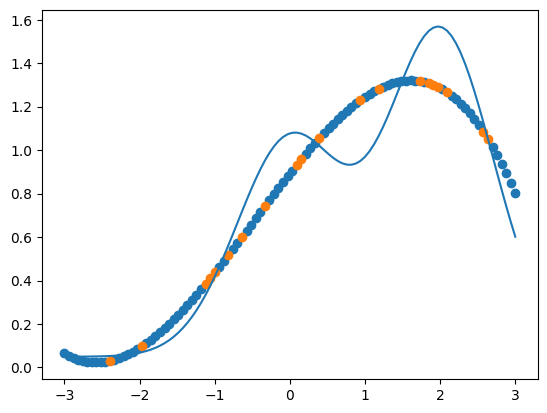

In [109]:
plt.plot(x, y)
plt.scatter(x_train, X_train_s @ beta + y_offset) # what is y_offset? my lambda??
plt.scatter(x_test, X_test_s @ beta + y_offset)


## Exercise 4 - Testing multiple hyperparameters

**a)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5 with lambda set to 0.01. Plot the MSE as a function of polynomial degree.

**b)** Compute the MSE of your ridge model for a polynomial with degree 3, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of lambda.

**c)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of polynomial degree and lambda using a [heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).

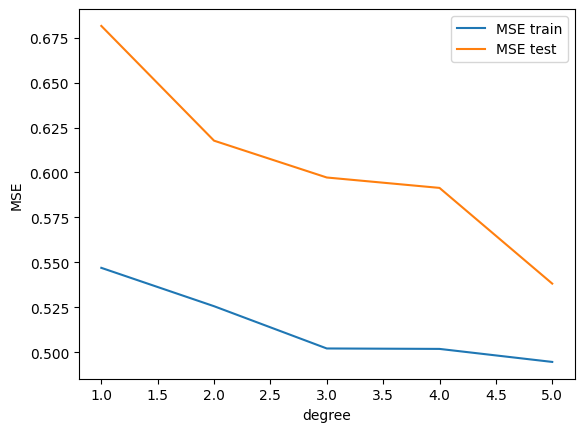

In [ ]:
# a) I don't understand this one 

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

degree = range(1,6)
mse_ridge_train = []
mse_ridge_test = []

for d in degree:

    X = polynomial_features(x, d)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    #y_offset = np.mean(y_train)
    
    beta = Ridge_parameters(X_train_s, y_train)
    ytilde_train = X_train_s @ beta + 0.01
    ytilde_test = X_test_s @ beta + 0.01
    
    mse_ridge_train.append(mean_squared_error(y_train, ytilde_train))
    mse_ridge_test.append(mean_squared_error(y_test, ytilde_test))


plt.plot(degree, mse_ridge_train, label = "MSE train")
plt.plot(degree, mse_ridge_test, label = "MSE test")
plt.legend()
plt.ylabel('MSE')
plt.xlabel('degree')
plt.show()